In [17]:
import random

import altair as alt
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)

First we import the the tools used for knn-classification

Next import the dataset used

In [18]:
df = pd.read_excel("health-data.xlsx")
df2 = pd.read_csv("functioning-government-index-eiu.csv")
df2 = df2[df2["Year"]==2019]
df2 = df2[["Entity", "funct_gov_eiu"]]
df10['funct_gov'] = ['Yes' if x > 4 else 'No' for x in df10['funct_gov_eiu']]
df10 = df10[["Entity", "funct_gov"]]
df10.rename(columns={'Entity': 'Country'}, inplace=True)
df10.head()

df.head()

,Country,Air Quality Cities,Air Quality Rural,Air Quality Total,Air Quality Towns,Air Quality Urban,Alcohol Intake Both Sexes,Alcohol Intake Female,Alcohol Intake Male,Both sexes,...,Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),Both sexes age 60,Female age 60,Male age 60,Both sexes birth,Female birth,Male birth,The totalpopulation not using improved water sources,% Obesity
0,Afghanistan,84.04,56.00,62.49,62.47,75.19,0.016,0.004,0.029,59.92,...,60.980007,41.880005,15.21,15.06,15.39,63.21,63.16,63.29,0.237127,14.88
1,Bangladesh,50.12,37.98,45.99,42.47,46.85,0.005,0.001,0.009,30.42,...,62.469997,34.920000,20.86,21.53,20.26,74.25,75.64,72.99,0.010330,2.97
2,Cambodia,19.80,17.43,17.80,17.30,18.35,8.480,3.430,13.800,26.81,...,65.120020,36.720010,17.74,19.11,15.93,70.12,72.75,67.23,0.155012,3.12
3,China,39.12,31.13,38.15,41.42,40.17,5.730,2.280,9.090,7.98,...,120.959990,90.209990,21.06,23.08,19.19,77.43,80.49,74.73,0.036348,8.94
4,India,55.57,45.63,50.17,49.95,53.03,4.920,1.560,8.100,34.33,...,67.830000,59.299995,18.82,19.54,18.11,70.79,72.17,69.52,0.042340,5.38


Now we merge the Classification dataset into the main dataset

In [19]:
df = pd.merge(df, df2, how='inner', on='Country')

Below is a visualization of the data using Life Expectancy at 60 and Calorie variation with the classification variable as the color.

In [20]:
df["funct_gov"] = df["funct_gov"].replace({
     'N':'No',
     'Y':'Yes'
 })

func_plot = alt.Chart(df).mark_circle().encode(
    x=alt.X('Both sexes age 60', title='Life Expectancy age 60'),
    y=alt.Y('Coefficient of Variation (CV) of caloric intake', title='Caloric variation'),
    color=alt.Color('funct_gov').title('funct_gov')
)
func_plot

alt.Chart(...)

#### Creating model

In [21]:
X = df[['Air Quality Cities', 'Air Quality Rural', 'Air Quality Total', 'Air Quality Towns', 'Air Quality Urban', 'Alcohol Intake Both Sexes', 'Both sexes', 'Coefficient of Variation (CV) of caloric intake', 'Self-harm', 'Exposure to forces of nature', 'Conflict and terrorism', 'Interpersonal violence', 'Neglected tropical diseases and malaria', 'Substance use disorders', 'Skin and subcutaneous diseases', 'Enteric infections', 'Diabetes and kidney diseases', 'Cardiovascular diseases', 'Digestive diseases', 'Nutritional deficiencies', 'Respiratory infections and tuberculosis', 'Neonatal disorders', 'Chronic respiratory diseases', 'Other non-communicable diseases', 'Maternal disorders', 'Unintentional injuries', 'Musculoskeletal disorders', 'Neoplasms', 'Mental disorders', 'Neurological disorders', 'HIV/AIDS and sexually transmitted infections', 'Transport injuries', 'Sense organ diseases', 'Population', 'Both sexes birth', 'Both sexes age 60', 'Food supply (kcal per capita per day)', 'Food supply (Protein g per capita per day)', 'Food supply (Fat g per capita per day)', 'The totalpopulation not using improved water sources', '% Obesity']]
y = df['funct_gov']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

knn_pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3) 
)
knn_fit = knn_pipe.fit(X, y)

Below is a test for the new model using data from Belgium, Chile, Chad, New Zealand, and Sudan as test cases

In [22]:
df3 = pd.DataFrame(columns=X.columns)
df3.loc[0]= [22.63, 18.82, 20.49, 19.57, 22.16, 6.75, 7.15, 0.23, 2.09, 0.01, 0, 1.21, 0.24, 2.21, 2.4, 0.53, 6.19, 12.43, 5.24, 0.51, 2.21, 1.82, 3.55, 7.13, 0.09, 5.31, 10.89, 15.34, 8.58, 5.41, 0.66, 2.84, 2.74, 19039484, 80.74, 24.27, 3048.001, 104.55, 89.98003, 0, 34.1]
df3.loc[1]= [12.3, 9.91, 11.26, 11.8, 11.57, 10.28, 4.11, 0.2, 2.5, 0, 0, 0.36, 0.01, 2.17, 2.53, 0.63, 4.31, 14.15, 3.56, 0.53, 2.46, 0.89, 5.25, 7.16, 0.02, 6.25, 9.27, 19.41, 6.69, 7.57, 0.14, 1.53, 2.35, 11510569, 81.42, 24.02, 3849.001, 106.39, 177.78, 0, 19.79]
df3.loc[2]= [60.7, 38.74, 41.15, 42.97, 54.01, 3.73, 114.3, 0.4, 0.38, 0, 0.25, 0.68, 5.75, 0.14, 0.69, 22.21, 1.23, 3.47, 1.95, 3.13, 15.24, 13.49, 1.03, 5.99, 1.7, 2.46, 1.04, 1.8, 1.87, 1.38, 3.29, 1.64, 0.68, 16126868, 59.63, 16.54, 2299, 79.74001, 71.26001, 0.371173, 7.71]
df3.loc[3]= [8.54,8.31,8.61,8.93,8.69,9.89,4.93,0.21,2.01,0.01,0.0,0.54,0.02,2.37,2.66,0.41,4.07,15.13,2.45,0.35,1.24,1.33,5.26,6.58,0.06,8.1,8.59,18.47,8.69,6.29,0.09,2.15,2.95,4959033.0,24.83,81.96,3129.998,102.64993,113.40993,0.0,32.99]
df3.loc[4]= [24.42,21.0,21.43,22.24,23.46,0.005,58.43,0.28,0.89,0.01,0.41,0.43,2.13,0.53,1.35,5.12,2.82,14.93,2.06,2.21,3.78,15.58,2.27,12.43,1.18,4.64,3.66,4.43,5.85,3.3,2.89,3.26,1.4,43232092.0,2572.9998,75.74,65.93,69.15,18.64,0.1100729407219063,11.74]
df3.head()

,Air Quality Cities,Air Quality Rural,Air Quality Total,Air Quality Towns,Air Quality Urban,Alcohol Intake Both Sexes,Both sexes,Coefficient of Variation (CV) of caloric intake,Self-harm,Exposure to forces of nature,...,Transport injuries,Sense organ diseases,Population,Both sexes birth,Both sexes age 60,Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),The totalpopulation not using improved water sources,% Obesity
0,22.63,18.82,20.49,19.57,22.16,6.750,7.15,0.23,2.09,0.01,...,2.84,2.74,19039484.0,80.7400,24.27,3048.001,104.55000,89.98003,0.000000,34.10
1,12.30,9.91,11.26,11.80,11.57,10.280,4.11,0.20,2.50,0.00,...,1.53,2.35,11510569.0,81.4200,24.02,3849.001,106.39000,177.78000,0.000000,19.79
2,60.70,38.74,41.15,42.97,54.01,3.730,114.30,0.40,0.38,0.00,...,1.64,0.68,16126868.0,59.6300,16.54,2299.000,79.74001,71.26001,0.371173,7.71
3,8.54,8.31,8.61,8.93,8.69,9.890,4.93,0.21,2.01,0.01,...,2.15,2.95,4959033.0,24.8300,81.96,3129.998,102.64993,113.40993,0.000000,32.99
4,24.42,21.00,21.43,22.24,23.46,0.005,58.43,0.28,0.89,0.01,...,3.26,1.40,43232092.0,2572.9998,75.74,65.930,69.15000,18.64000,0.110073,11.74


In [23]:
print("Belgium: ", knn_fit.predict(df3)[0])
print("Chile: ", knn_fit.predict(df3)[1])
print("Chad: ", knn_fit.predict(df3)[2])
print("New Zealand: ", knn_fit.predict(df3)[3])
print("Sudan: ", knn_fit.predict(df3)[4])

Belgium:  Yes
Chile:  Yes
Chad:  No
New Zealand:  Yes
Sudan:  Yes


#### Actual values
Belgium: Yes

Chile: Yes

Chad: No

New Zealand: Yes

Sudan: No

Finally, we create a confusion matrix showing the accuracy of the model

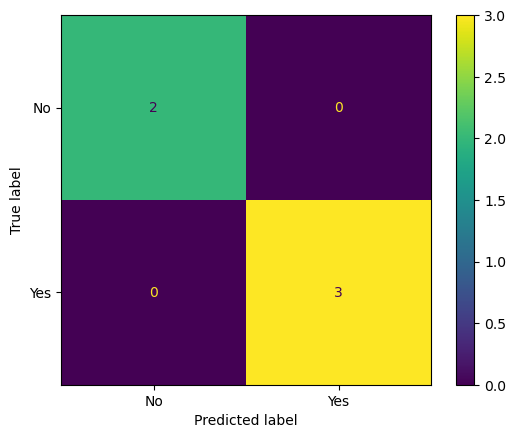

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    knn_fit,  # We are directly passing the pipeline and let sklearn do the predictions for us
    x_test,
    y_test
)



Precision and Recall scores in this matrix are self-evident